# Processing data from multiple files

The biggest advantage of using code to process data is that a method devised for one file can easily be applied to many.

This workbook demonstrates reading data from a file and using functions to repeat chunks of code.  Data are read curves fitted and results plotted for multiple files.

### Setting up

In [1]:
# Import modules
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Show plots within notebooks
%matplotlib inline

# Show module versions
print('Python: {}'.format(sys.version))
print('Pandas: {}'.format(pd.__version__))
print('Numpy: {}'.format(np.__version__))
from matplotlib import __version__ as mplv
print('Matplotlib: {}'.format(mplv))

Python: 3.8.10 (default, Jun  2 2021, 10:49:15) 
[GCC 9.4.0]
Pandas: 1.3.0
Numpy: 1.21.0
Matplotlib: 3.4.2


### The **os** module

This section ensures that you are working in the correct directory and shows some of the features of the _os_ module.

In [2]:
#  Set current directory as working directory
# (Change this if appropriate)
wdir = os.getcwd()
print(wdir)

/home/jostev/github/python4geoscientists


In [3]:
#  Join folder and file names to create new paths, using correct separator for your operating system
datadir = os.path.join( wdir, 'data_files' )
print(datadir)

/home/jostev/github/python4geoscientists/data_files


In [4]:
#  Extract file name from a full path
filepath = '/long/path/to/myfile.txt'
os.path.basename(filepath)

'myfile.txt'

In [5]:
#  List directory contents
filelist = os.listdir(datadir)
filelist

['Sample016.data',
 'Sample014.data',
 'Sample029.data',
 'Sample018.data',
 'Sample026.data',
 'Sample002.data',
 'Sample022.data',
 'Sample010.data',
 'Sample007.data',
 'Sample017.data',
 'Sample027.data',
 'Sample020.data',
 'Sample006.data',
 'Sample008.data',
 'Sample023.data',
 'Sample025.data',
 'Sample004.data',
 'Sample021.data',
 'GVP_Volcano_List.csv',
 'Sample009.data',
 'Sample024.data',
 'Sample019.data',
 'Sample030.data',
 'infrared_camera_data.csv',
 'Sample003.data',
 'Sample013.data',
 'Sample005.data',
 'Sample028.data',
 'factbook_extracts.csv',
 'Sample001.data',
 'Sample015.data',
 'Sample011.data',
 'Sample012.data']

In [6]:
#  List data files
datafiles = []
for filename in filelist:
    if filename.endswith('.data'):
        datafiles.append(filename)
datafiles.sort()
print(datafiles)

# Bonus exercise: use 'glob' module to get same results

['Sample001.data', 'Sample002.data', 'Sample003.data', 'Sample004.data', 'Sample005.data', 'Sample006.data', 'Sample007.data', 'Sample008.data', 'Sample009.data', 'Sample010.data', 'Sample011.data', 'Sample012.data', 'Sample013.data', 'Sample014.data', 'Sample015.data', 'Sample016.data', 'Sample017.data', 'Sample018.data', 'Sample019.data', 'Sample020.data', 'Sample021.data', 'Sample022.data', 'Sample023.data', 'Sample024.data', 'Sample025.data', 'Sample026.data', 'Sample027.data', 'Sample028.data', 'Sample029.data', 'Sample030.data']


### Reading the datafiles

In [7]:
#  A simple script to read a data file
x = []
y = []
filepath = os.path.join(datadir, 'Sample001.data')

with open(filepath, 'rt') as f:
    groupline = f.readline()  # Skip first line
    for line in f.readlines():
        cols = line.split(',')
        x.append(cols[0])
        y.append(cols[1])
        
x = np.array(x, dtype=float)
y = np.array(y, dtype=float)
print('x: {}'.format(x))
print('y: {}'.format(y))

x: [ 0.65  1.88  2.25  3.99  4.88  5.64  6.5   7.19  8.97  9.47 10.83 11.13]
y: [19.79 17.03 21.07 27.58 26.59 29.95 31.91 29.03 39.07 35.49 48.93 38.31]


In [8]:
#  Code that is often reused can be put in a function.
def read_data_file(filepath):
    """Read SampleXXX.data file, returning x and y as numpy arrays."""
    x = []
    y = []
        
    with open(filepath, 'rt') as f:
        groupline = f.readline()  # Skip first line
        for line in f.readlines():
            cols = line.split(',')
            x.append(cols[0])
            y.append(cols[1])
    
    x = np.array(x, dtype=float)
    y = np.array(y, dtype=float)
    
    return x, y

In [9]:
#  Read a data file using the function
filepath = os.path.join(datadir, 'Sample001.data')
x, y = read_data_file(filepath)
print(x)
print(y)

[ 0.65  1.88  2.25  3.99  4.88  5.64  6.5   7.19  8.97  9.47 10.83 11.13]
[19.79 17.03 21.07 27.58 26.59 29.95 31.91 29.03 39.07 35.49 48.93 38.31]


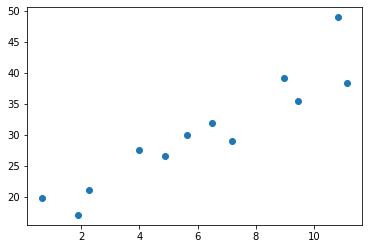

In [10]:
#  Plot the data - it really is this easy!!!
plt.scatter(x, y)

### Calculating the best fit line

In [11]:
#  Use the linregress function from the scipy.stats module
slope, intercept, r_value, p_value, std_err = linregress(x, y)
os.path.basename(filename)

#  See https://mkaz.com/2012/10/10/python-string-format/ for string format hints
results_text = """
Filename: {filename}
Slope: {slope:.2f}
Intercept: {intercept:.2f}
R-squared: {r2:.2f}
""".format(filename=filename,slope=slope, intercept=intercept, r2=r_value**2)
print(results_text)


Filename: Sample012.data
Slope: 2.40
Intercept: 15.70
R-squared: 0.87



In [12]:
#  Calculate coordinates for the ends of the best fit line.
fitted_x = np.array([x.min(), x.max()])  # Take these from the original data
fitted_y = slope * fitted_x + intercept

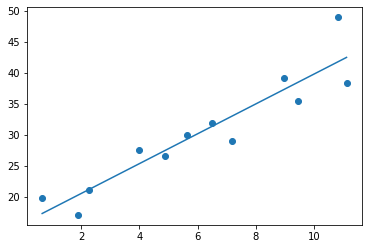

In [13]:
#  Plot the best fit line
plt.scatter(x, y)
plt.plot(fitted_x, fitted_y, '-')

In [14]:
#  Code that is reused can be put into a function
def calculate_best_fit(x, y):
    """Use linregress to calculate best fit line, returning fitted X and Y arrays for plotting."""
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    fitted_x = np.array([x.min(), x.max()])
    fitted_y = slope * fitted_x + intercept   
    return fitted_x, fitted_y

### Combine functions into single plotting function

In [15]:
#  Function to plot figure
def plot_sample_fit(filepath):
    """Read data file, calculate fit to x and y, plot and save figure."""
    x, y = read_data_file(filepath)  # Uses previous function
    fitted_x, fitted_y = calculate_best_fit(x, y)  # Uses previous function
    
    # Plot the figure
    plt.figure()
    plt.plot(x, y, 'o')
    plt.plot(fitted_x, fitted_y, '-x', label='Fitted')
    plt.ylim(0, 80)
    plt.xlabel('x')
    plt.ylabel('y')
    
    # Save the file
    filename = os.path.basename(filepath)
    plt.title(filename[:-5])
    figure_filename = filename.replace('.data', '.png')
    plt.savefig(figure_filename)
    plt.close()
    return

In [16]:
#  Plot all files.  Check the working directory and see all the files plotted.  Just like that!
for datafile in datafiles:
    print(datafile)
    data_file_path = os.path.join(datadir, datafile)
    plot_sample_fit(data_file_path)

Sample001.data
Sample002.data
Sample003.data
Sample004.data
Sample005.data
Sample006.data
Sample007.data
Sample008.data
Sample009.data
Sample010.data
Sample011.data
Sample012.data
Sample013.data
Sample014.data
Sample015.data
Sample016.data
Sample017.data
Sample018.data
Sample019.data
Sample020.data
Sample021.data
Sample022.data
Sample023.data
Sample024.data
Sample025.data
Sample026.data
Sample027.data
Sample028.data
Sample029.data
Sample030.data


# Exercises

1. Modify plot_sample_fit to save your figures as pdf files
2. Modify the calculate_best_fit so that it also returns results_text
3. Modify plot_sample_fit to use plt.text to write results_text onto your graph
4. The data belong to two groups (open a Sample file to see).  What is the average
   gradient and intercept of each group?